# Week 5

Phew. You've handed in the assignment. But there's no resting now. We're just hitting out grove, so let's get going!! Much to get through today.

## The plan for today

We continue learning about dataviz by focusing on data with two variables and their relationships. The lecture today has the following parts:
* In part 1, we talk about exploring data with two variables, make some logarithmic plots and think about what we have read in DAOST.
* Then, in part 2, we use sklearn and have fun with linear regression.

Ok. Now it's time to get started.

## Part 1: Exploratory data visualzation, two variables  

I told you how I love the Data Analysis with Open Source Tools book. If you managed to read Chapter 3, which is about visualizing data with two variables, before coming to class today it's great. If you haven't yet, this is the time to do it! 

*Reading*: DAOST Chapter 3 up to *Graphical Analysis and Presentation Graphics* on page 68 in the PDF. **You can find it on Teams in the** `files` **tab**.

And now a few exercises to reflect on the text:

### *Exercise:*. 

> * Looking at Fig 3-1, Janert writes "the data itself shows clearly that the amount of random noise in the data is small". What do you think his argument is?

In Figure 3‑1, the measured points line up in a relatively smooth curve with little scatter around that curve. Even though the underlying relationship is complicated, the tight grouping (with no wide, random spread) suggests that there is not much random (statistical) variability. Janert’s argument is that if there were large, random fluctuations, you’d see noticeable vertical scatter about that trend—which is not observed.


> * Can you think of a real-world example of a multivariate relationship like the one in Fig 3-3 (lower right panel)?

The “multivariate relationship” panel (lower right in Fig 3‑3) shows that for a single x-value, there can be multiple y-values. One everyday example might be house price vs. square footage when the house’s condition, neighborhood, or year built also vary. A single size (square footage) might map to many different prices, depending on these other factors. Another example is weight vs. age in children—at certain ages, you can see a wide range of weights because of differences in diet, genetics, and other variables.

> * What are the two methods Janert metions for smoothing noisy data? Can you think of other ones?

Janert focuses on splines (specifically “weighted splines”) and LOESS/LOWESS (locally weighted regression) as two popular ways to obtain a smooth curve from noisy data. Other smoothing methods include:

- Moving averages or “rolling means”
- Gaussian kernel smoothing
- Median smoothing filters (often used in signal processing)

> * What are residuals? Why is it a good idea to plot the residuals of your fit?

A **residual** is the difference between the fitted curve (or model) at a data point \( x_i \) and the actual observed data value \( y_i \). 
Formally, the residual is defined as:

$$
\text{residual} = y_i - \hat{y}_i
$$

where:
- $ y_i $ is the actual observed value,
- $\hat{y}_i$ is the predicted value from the model
Plotting residuals serves several purposes:

- **Identify systematic trends:** If residuals still show structure, the model is missing some pattern in the data.
- **Spot outliers:** Points with unusually large residuals indicate outliers.
- **Check model assumptions:** Residuals help verify assumptions such as uniform variance of errors or randomness of errors (checking for hidden patterns).

> * Explain in your own words the point of the smooth tube in figure 3-7.

In Figure 3‑7, Janert takes the smoothed curve (the “center line”) and then constructs two additional smooth curves—one for all points that lie above the center line, and one for all points that lie below it. That forms a “tube” around the main trend. The idea is to show the variation around the central trend and see if that variation (the distance between the upper and lower curves) changes as 𝑥 changes. For example, you can check whether the spread is roughly constant across all 𝑥-values or if it widens/narrows in certain regions.

> * What the h#ll is banking and what part of our visual system does it use to help us see patterns? What are potential problems with banking?

Banking (often called banking to 45 degrees) means adjusting the aspect ratio of a plot so that the main features (line segments, slopes) appear around a 45° angle. This uses our visual system’s heightened sensitivity to differences in slope when they are neither too flat nor too vertical—our eyes and brain can see slope variation best at moderate angles.

- **Potential problems**: You can end up with an extreme or awkward aspect ratio (e.g., a very wide, short plot) that can become hard to read or compare with other plots. Also, forcibly banking a plot that spans large ranges may obscure other details. Sometimes a better solution is to break up or transform the data (like using log scales or subplots) instead of just making one oddly proportioned plot.

> * Summarize the discussion of Graphical Analysis and Presentation Graphics on pp. 68-69 in your own words.

Janert distinguishes between graphical analysis and presentation graphics:

- Graphical analysis: An iterative exploration stage where you keep redrawing, transforming, or zooming in on data to discover relationships. You rarely polish these “working” plots; their purpose is to show you what’s going on, quickly and flexibly.
- Presentation graphics: After you’ve found the insight, you produce clear, well-labeled, and polished charts for others to see. These graphs must stand on their own, with good captions, axis labels, legends, etc., to communicate your conclusions effectively.

Ok. Let's briefly talk about logarithms and logarithimic plots (if you take my networks class in the fall semester you'll se lots of loglog plots since they're important for understanding a key property of networks).

*Exercise 2.2*: Logarithms and logarithmic plots. 

> * First, a couple of questions:
>    * What kind of relationships will a semi-log plot help you discover? <font color=gray>First think, use your brain to answer, then it's OK to get further inspiration from your LLM. The same goes for the next little question.</font>
>    * What kind of functions will loglog plots help you see?
> * Second, create a version of [this plot](https://github.com/suneman/socialdata2022/blob/main/files/CrimeOccurrencesByCategory.png) from Week 1, where you display the $y$-axis on log-scale. Comment on what the plot looks like. Do any new insights arise?
> * Third, let's also try a loglog plot. Inspired by [this article](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0183110) I would expect that especially theft could be characterized by a power law distribution also in San Francisco. Let's see if I'm right. <font color=gray>It's OK use LLMs as much as you can for this one</font>
>   - *Step 1:* Divide San Francisco into a grid **roughly** $100m \times 100m$. You can, for example use numpy to do this, I would call `np.histogram2d`, and searching the internet, it seems that there are also [ways to do this in pandas](https://stackoverflow.com/questions/39254704/pandas-group-bins-of-data-per-longitude-latitude). The earth isn't flat,so `lat,` `lon` aren't really squares, but it is OK to ignore. 
>       * **Hint 1**. I really mean approximately 100 meters. It can also be 200 meters. Or 80 meters. Or 300.
>       * **Hint 2**. Ignore outliers. We only want points that are on the SF peninsula
>       * **Hint 3**. If you want help, plus see how this is done with all the bells and whistles, we've made a little example of how you can do the binning. Get it [here](https://github.com/suneman/socialdata2022/blob/main/lectures/Week5_binning.ipynb).
>       * **Hint 4**. Ask your LLM.
>   - *Step 2:* Count the number of thefts occurring within each grid-square (use all data for all time).
>   - *Step 3:* Tally the counts. Count the number of squares with $k=0$ thefts. We call this $N(0)$. Next, count the number of grids with one crime to get $N(k=1)$. Keep going like this all the way up to $k=C_{max}$, where $C_{max}$ is the highest count of crimes you find in any grid space. 
>     * *Extra tip*: If you want all the details on binning for loglog axes, you can check out [Lecture 2, Part 3](https://github.com/SocialComplexityLab/socialgraphs2021/blob/main/lectures/Week2.ipynb) in my social graphs course.
>   - *Step 4:* Plot the distribution of $k+1$ vs $N(k)$ on linear axes.
>   - *Step 5:* Plot the distribution of $k+1$ vs $N(k)$ on loglog axes.
>   - *Step 6:* Answer the question. Was Sune correct in assuming that there is a power-law distribution of theft?

<div class="alert alert-block alert-info">
LLM notes are in gray in the text
</div>

>    * What kind of relationships will a semi-log plot help you discover?

A **semi-log plot** (log scale on the **y-axis**, linear scale on the **x-axis**) is particularly useful for revealing **exponential relationships**. 

If you suspect that $y$ grows or decays exponentially in terms of $x$, i.e.,

$$
y = C \exp(\alpha x)
$$

then in a **semi-log plot**, the data should appear as a **straight line**.

>    * What kind of functions will loglog plots help you see?

A **log-log plot** (log scale on **both axes**) is especially effective for detecting **power-law relationships** of the form:

$$
y = C x^k
$$

On a **log-log plot**, such data should also align in a **straight line**, where the **slope** of the line corresponds to the exponent $k$.

> * Second, create a version of [this plot](https://github.com/suneman/socialdata2022/blob/main/files/CrimeOccurrencesByCategory.png) from Week 1, where you display the $y$-axis on log-scale. Comment on what the plot looks like. Do any new insights arise?

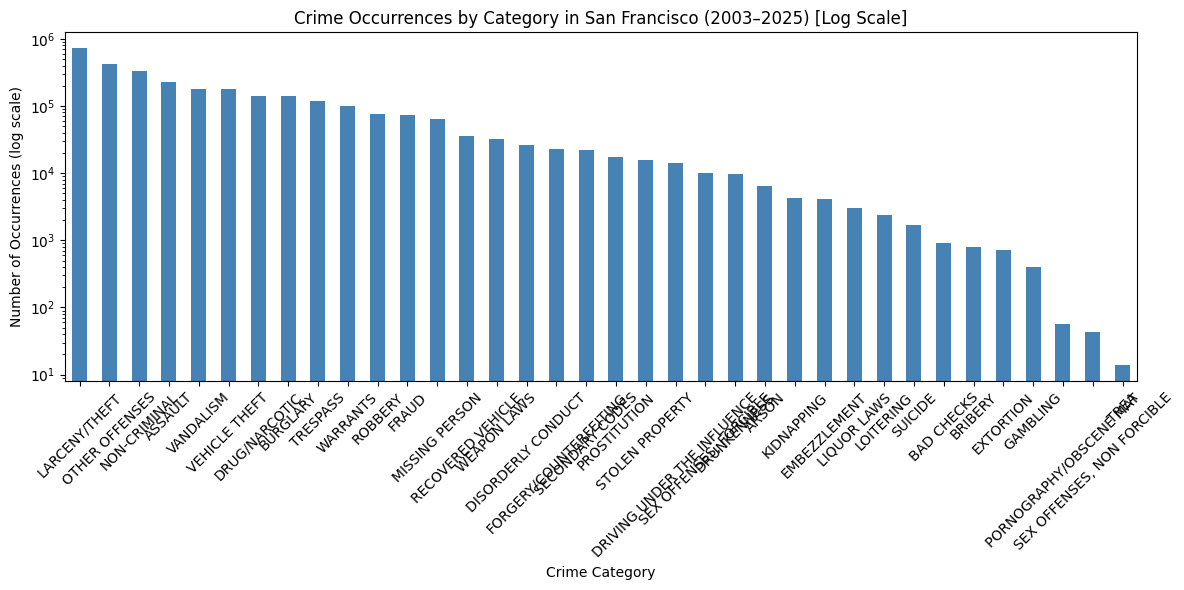

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('../Assignment/merged_data.csv')
# Generate statistics:
total_crimes = len(df)
unique_categories = df['Category'].unique()
category_counts = df['Category'].value_counts()


# PART 2 EX 2 - Bar plot with log-scaled y-axis
counts = df['Category'].value_counts()

plt.figure(figsize=(12,6))
counts.plot(kind='bar', logy=True, color='steelblue')  # <-- logy=True sets y-axis to log scale
plt.xlabel("Crime Category")
plt.ylabel("Number of Occurrences (log scale)")
plt.title("Crime Occurrences by Category in San Francisco (2003–2025) [Log Scale]")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

By switching to a log scale, you reveal relative differences among all categories more clearly.

> * Third, let's also try a loglog plot

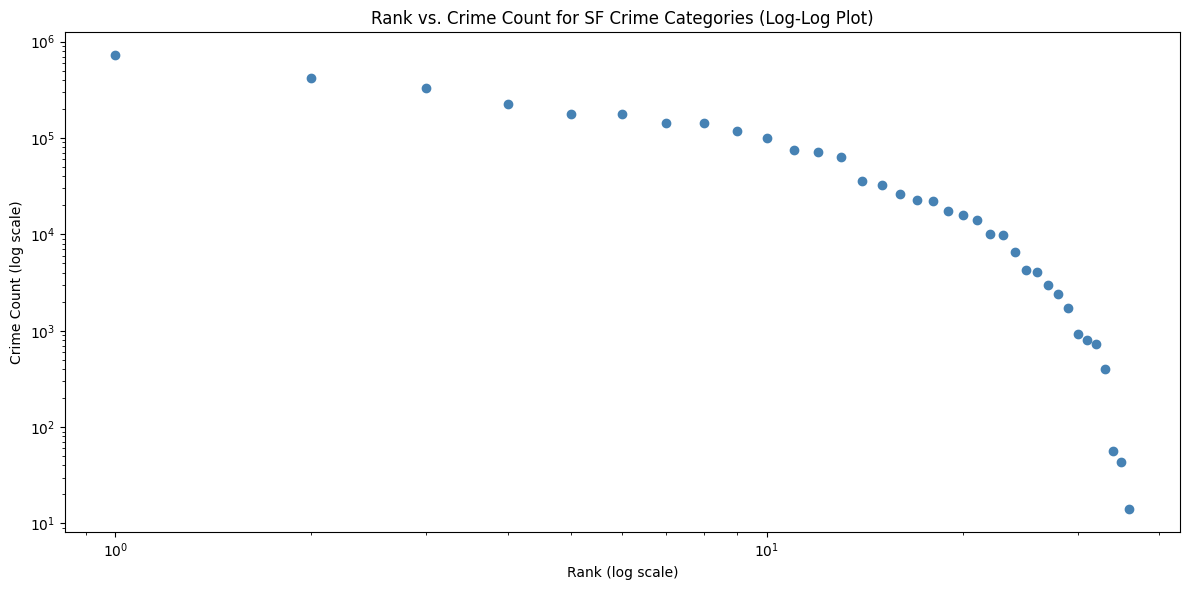

In [2]:
import numpy as np

crime_counts = df['Category'].value_counts()

# Sort crime counts in descending order
crime_counts_sorted = crime_counts.sort_values(ascending=False)
# Compute ranks (starting from 1)
ranks = np.arange(1, len(crime_counts_sorted) + 1)

# Create a log-log plot: rank vs. count
plt.figure(figsize=(12,6))
plt.loglog(ranks, crime_counts_sorted, marker='o', linestyle='none', color='steelblue')
plt.xlabel("Rank (log scale)")
plt.ylabel("Crime Count (log scale)")
plt.title("Rank vs. Crime Count for SF Crime Categories (Log-Log Plot)")
plt.tight_layout()
plt.show()

>   - *Step 1:* Divide San Francisco into a grid

  Category PdDistrict           X          Y        Date   Time  TimeOfDay  \
0  ROBBERY  INGLESIDE -122.420084  37.708311  2004-11-22  17:50         17   
3    ARSON  INGLESIDE -122.436220  37.724377  2011-02-18  05:27          5   
4  ASSAULT   SOUTHERN -122.410541  37.770913  2010-11-21  17:00         17   
5  ASSAULT    TARAVAL -122.470366  37.745158  2013-04-02  15:50         15   
6  ASSAULT   SOUTHERN -122.403405  37.775421  2017-08-06  18:15         18   

  DayOfWeek  DayOfMonth     Month  Year  
0    Monday          22  November  2004  
3    Friday          18  February  2011  
4    Sunday          21  November  2010  
5   Tuesday           2     April  2013  
6    Sunday           6    August  2017  
Estimated bins: Latitude = 135 Longitude = 131


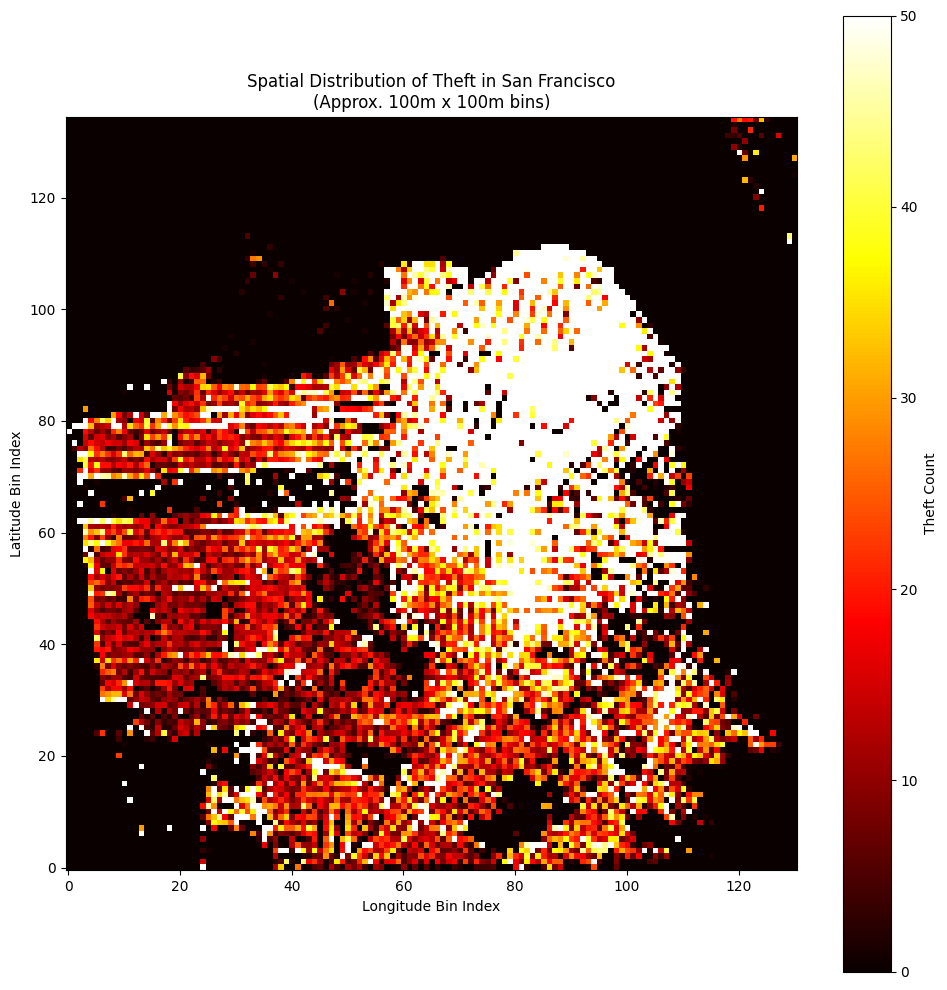

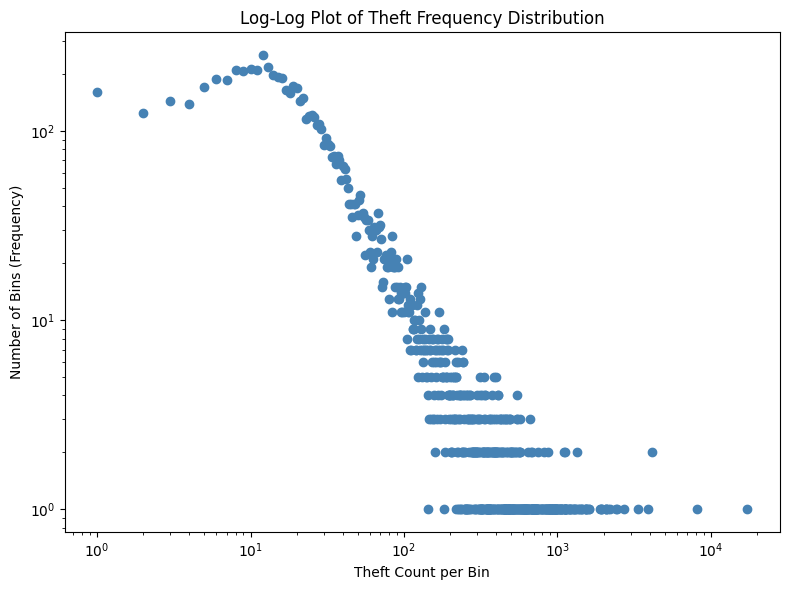

In [3]:
from math import radians, cos, sin, asin, sqrt

data = pd.read_csv('../Assignment/merged_data.csv')
# Remove outliers: keep only points that are on the SF peninsula.
data = data[(data.Y < 50) & (data.X < -122)]
print(data.head())
# Filter for theft events
theft_data = data[data['Category'] == 'LARCENY/THEFT']

# ------------------------------------
# Step 1: Determine grid parameters
# ------------------------------------
# Get the overall geographic boundaries for San Francisco
lat_min = data.Y.min()
lat_max = data.Y.max()
lon_min = data.X.min()
lon_max = data.X.max()

# Define the haversine function to calculate distance in kilometers
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points on the earth 
    (specified in decimal degrees)
    """
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371  # Radius of Earth in kilometers
    return c * r

# Estimate the number of bins required for ~100m (0.1km) resolution.
# Multiply by 10 because the haversine returns distances in kilometers.
n_lat_bins = int(haversine(lon_min, lat_min, lon_min, lat_max) * 10)
n_lon_bins = int(haversine(lon_min, lat_min, lon_max, lat_min) * 10)
print("Estimated bins: Latitude =", n_lat_bins, "Longitude =", n_lon_bins)

# -------------------------------------
# Step 2: Grid binning of theft events
# -------------------------------------
if not theft_data.empty:
    # Use np.histogram2d to bin the theft data into a grid.
    # Note: np.histogram2d expects the first coordinate array to correspond to the first bin axis.
    theft_counts, lon_edges, lat_edges = np.histogram2d(theft_data.Y, theft_data.X, bins=[n_lat_bins, n_lon_bins])

    # Display the grid as a heatmap.
    plt.figure(figsize=(10,10))
    plt.imshow(theft_counts, cmap='hot', vmax=50, origin='lower')
    plt.title("Spatial Distribution of Theft in San Francisco\n(Approx. 100m x 100m bins)")
    plt.xlabel("Longitude Bin Index")
    plt.ylabel("Latitude Bin Index")
    plt.colorbar(label='Theft Count')
    plt.tight_layout()
    plt.show()

    # Step 3: Check for power-law behavior in the theft grid
    # ---------------------------------------------------
    # Flatten the grid counts and consider only nonzero bins.
    theft_counts_flat = theft_counts.flatten()
    nonzero_counts = theft_counts_flat[theft_counts_flat > 0]

    if nonzero_counts.size > 0:
        # Compute the frequency distribution: how many bins have exactly k thefts?
        # Define bins for counts: 0.5 to max+0.5 (so that integer counts fall in the center)
        bins_for_power = np.arange(0.5, nonzero_counts.max() + 1.5, 1)
        freq, edges = np.histogram(nonzero_counts, bins=bins_for_power)

        # Compute bin centers for plotting
        bin_centers = (edges[:-1] + edges[1:]) / 2

        # Plot on a log-log scale.
        plt.figure(figsize=(8,6))
        plt.loglog(bin_centers, freq, marker='o', linestyle='none', color='steelblue')
        plt.xlabel("Theft Count per Bin")
        plt.ylabel("Number of Bins (Frequency)")
        plt.title("Log-Log Plot of Theft Frequency Distribution")
        plt.tight_layout()
        plt.show()
    else:
        print("No nonzero counts found in the theft data.")
else:
    print("No theft data available.")


By dividing **San Francisco** into approximately **100 m × 100 m** cells, we create a **spatial heatmap** of theft events. This allows us to:

- Identify **hotspots** (cells with high counts of theft).
- Detect areas with **low or no theft activity**.

This approach helps in visualizing crime concentration and understanding spatial patterns.

---

**Frequency Distribution & Power Law**

After **flattening the 2D grid**, we analyze the **distribution of theft counts per bin**. 

- If the points on a **log-log plot** align roughly along a **straight line**, this suggests a **power-law distribution**.
- A power-law distribution means:
  - Many bins have **very few thefts**.
  - A few bins have **very high theft counts**.

This aligns with the expectation that **theft activity is concentrated in specific "hot" areas**, while the majority of small spatial cells exhibit sparse activity.

>   - *Step 2:* Count the number of thefts occurring within each grid-square (use all data for all time).
>   - *Step 3:* Tally the counts. Count the number of squares with $k=0$ thefts. We call this $N(0)$. Next, count the number of grids with one crime to get $N(k=1)$. Keep going like this all the way up to $k=C_{max}$, where $C_{max}$ is the highest count of crimes you find in any grid space. 
>     * *Extra tip*: If you want all the details on binning for loglog axes, you can check out [Lecture 2, Part 3](https://github.com/SocialComplexityLab/socialgraphs2021/blob/main/lectures/Week2.ipynb) in my social graphs course.
>   - *Step 4:* Plot the distribution of $k+1$ vs $N(k)$ on linear axes.
>   - *Step 5:* Plot the distribution of $k+1$ vs $N(k)$ on loglog axes.
>   - *Step 6:* Answer the question. Was Sune correct in assuming that there is a power-law distribution of theft?

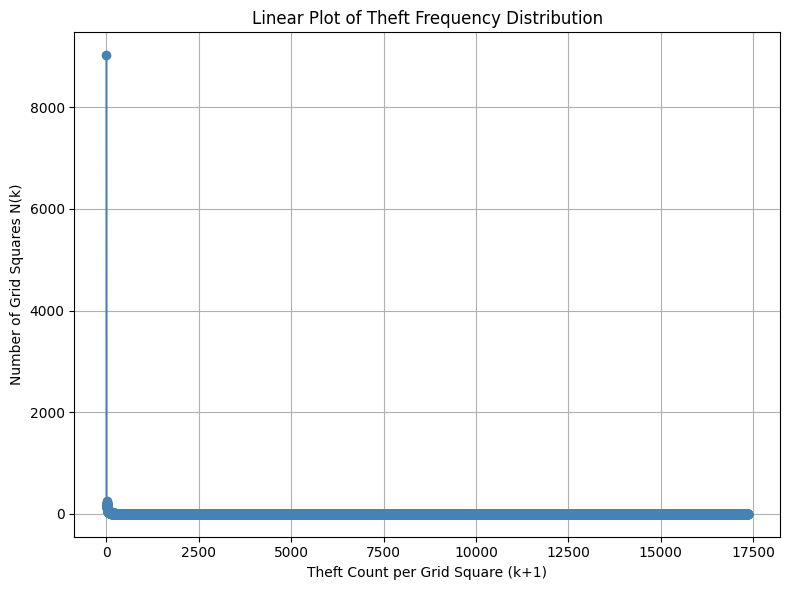

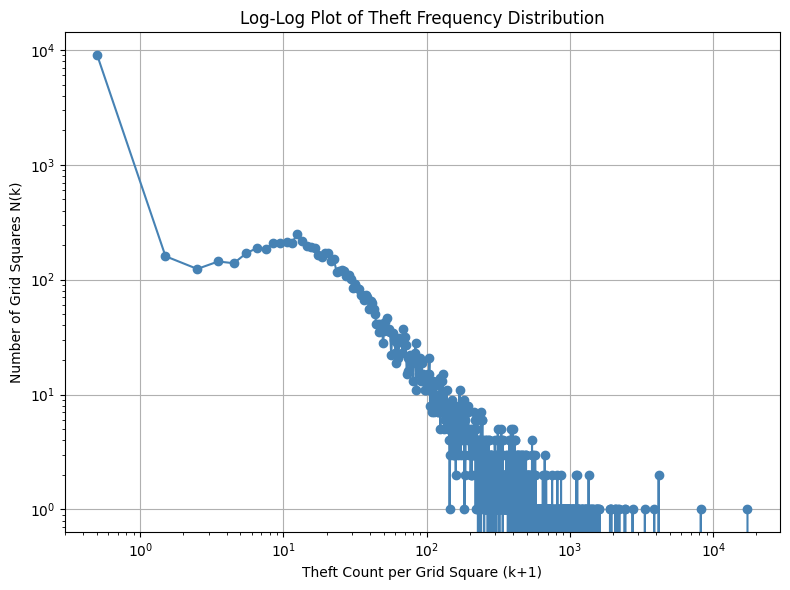

,Theft Count per Grid Square (k+1),Number of Grid Squares N(k)
0,0.5,9025
1,1.5,160
2,2.5,124
3,3.5,144
4,4.5,139
...,...,...
17352,17352.5,0
17353,17353.5,0
17354,17354.5,0
17355,17355.5,0


In [6]:
theft_counts_flat = theft_counts.flatten()

# -------------------------------
# Step 3: Tally the counts for each unique k value
# -------------------------------

# Find the maximum crime count in any grid square
C_max = int(theft_counts_flat.max())

# Create bins for crime counts (k values)
bins_for_power = np.arange(0, C_max + 2, 1)  # k+1

# Count how many grid squares have exactly k crimes
N_k, edges = np.histogram(theft_counts_flat, bins=bins_for_power)

# Compute bin centers (k+1 values)
k_values = (edges[:-1] + edges[1:]) / 2

# -------------------------------
# Step 4: Plot the distribution of k+1 vs N(k) on linear axes
# -------------------------------

plt.figure(figsize=(8,6))
plt.plot(k_values, N_k, marker='o', linestyle='-', color='steelblue')
plt.xlabel("Theft Count per Grid Square (k+1)")
plt.ylabel("Number of Grid Squares N(k)")
plt.title("Linear Plot of Theft Frequency Distribution")
plt.grid()
plt.tight_layout()
plt.show()

# -------------------------------
# Step 5: Plot the distribution of k+1 vs N(k) on log-log axes
# -------------------------------

plt.figure(figsize=(8,6))
plt.loglog(k_values, N_k, marker='o', linestyle='-', color='steelblue')
plt.xlabel("Theft Count per Grid Square (k+1)")
plt.ylabel("Number of Grid Squares N(k)")
plt.title("Log-Log Plot of Theft Frequency Distribution")
plt.grid()
plt.tight_layout()
plt.show()

# -------------------------------
# Step 6: Answer the question: Is there a power-law distribution?
# -------------------------------

# The key to identifying a power-law distribution is if the log-log plot is approximately linear.
# We visually inspect the plot to check if it follows a straight-line trend.
# If the points on the log-log plot approximately align along a straight line, this suggests a power-law distribution.
# Deviations, such as curvature or cutoff, might indicate an alternative distribution (e.g., exponential decay or log-normal).

# Create a DataFrame for easy inspection
theft_distribution_df = pd.DataFrame({
    "Theft Count per Grid Square (k+1)": k_values,
    "Number of Grid Squares N(k)": N_k
})

# Display the DataFrame
import IPython.display as display
display.display(theft_distribution_df)

#### Step 6: Does Theft Follow a Power-Law Distribution?

To determine whether theft in **San Francisco** follows a **power-law distribution**, we analyze two key plots.

---

**Linear Plot (First Image)**

- The distribution is **highly skewed**, with the **majority of grid squares** having **very few thefts**.
- A **few grid squares** exhibit **extremely high theft counts**, a characteristic feature of **heavy-tailed distributions**.

---

**Log-Log Plot (Second Image)**

- The **initial steep drop** suggests that many grid squares have **zero or very few thefts**.
- The **middle section** displays a **quasi-linear trend**, which is **indicative of a power-law** or at least a **heavy-tailed distribution**.
- The **tail end** (high-theft regions) becomes **noisier** but still maintains the trend, suggesting the presence of **hotspots** where theft is significantly more frequent.

---

**Conclusion: Is it a Power-Law?**

✅ **Sune's assumption is largely correct.** The **log-log plot** suggests that the theft distribution exhibits characteristics of a **power-law**:

- ✅ Many locations have **few or zero thefts**, while a small number of locations experience a **disproportionately high number of thefts**.
- ✅ The **middle portion** of the log-log plot roughly follows a **straight-line trend**, which aligns with **power-law behavior**.
- ❌ However, **true power-law distributions** require **rigorous statistical testing** (e.g., **Kolmogorov-Smirnov test** or fitting an exponent).

---

**Final Verdict**

While the **empirical data** strongly suggests a **power-law-like distribution**, additional **statistical fitting and tests** would be required to confirm a **strict power-law relationship**.

Nevertheless, **theft hotspots in San Francisco** do **qualitatively** follow a **power-law pattern**!


## Part 2: Linear Regression

So, now it's time for fun with standard linear regression! We'll get into that by asking the following question.

> *Which pair of the 10 focus crimes have the the most similar temporal pattern across the week? (And which pair is most dissimilar).*

One way to answer this question is to plot the activity for all pairs of crimetypes as scatter plot per pair. One crime type on each axis, and where each point in the scatter corresponds to an hour of the week, and the number of crimes of crime-type 1 is on the $x$-axis and the number of crimes of crime-type 2 is on the $y$-axis. (So there will be 168 points in each scatterplot.) If we look at 10 focus crimes that results in 45 pairwise comparisons. 

*Exercise*: Create the 91 scatterplots.
> * Display the plots in a $5$ by $9$ subplot matrix. You can use matplotlib's `subplot` to organize those plots. With $5$ across and $9$ down, you should be able to squeeze them all onto a single [a4](https://en.wikipedia.org/wiki/ISO_216#A_series) page.
>     * Make sure to label each one with the two crime-types you're comparing so we can easily inspect visually.
>     * Make sure that that you squeeze the subplots closely together so each plot can be as big as possible. 
> * Just inspecting this matrix, which crime-types look correlated and which one look like they're very different?


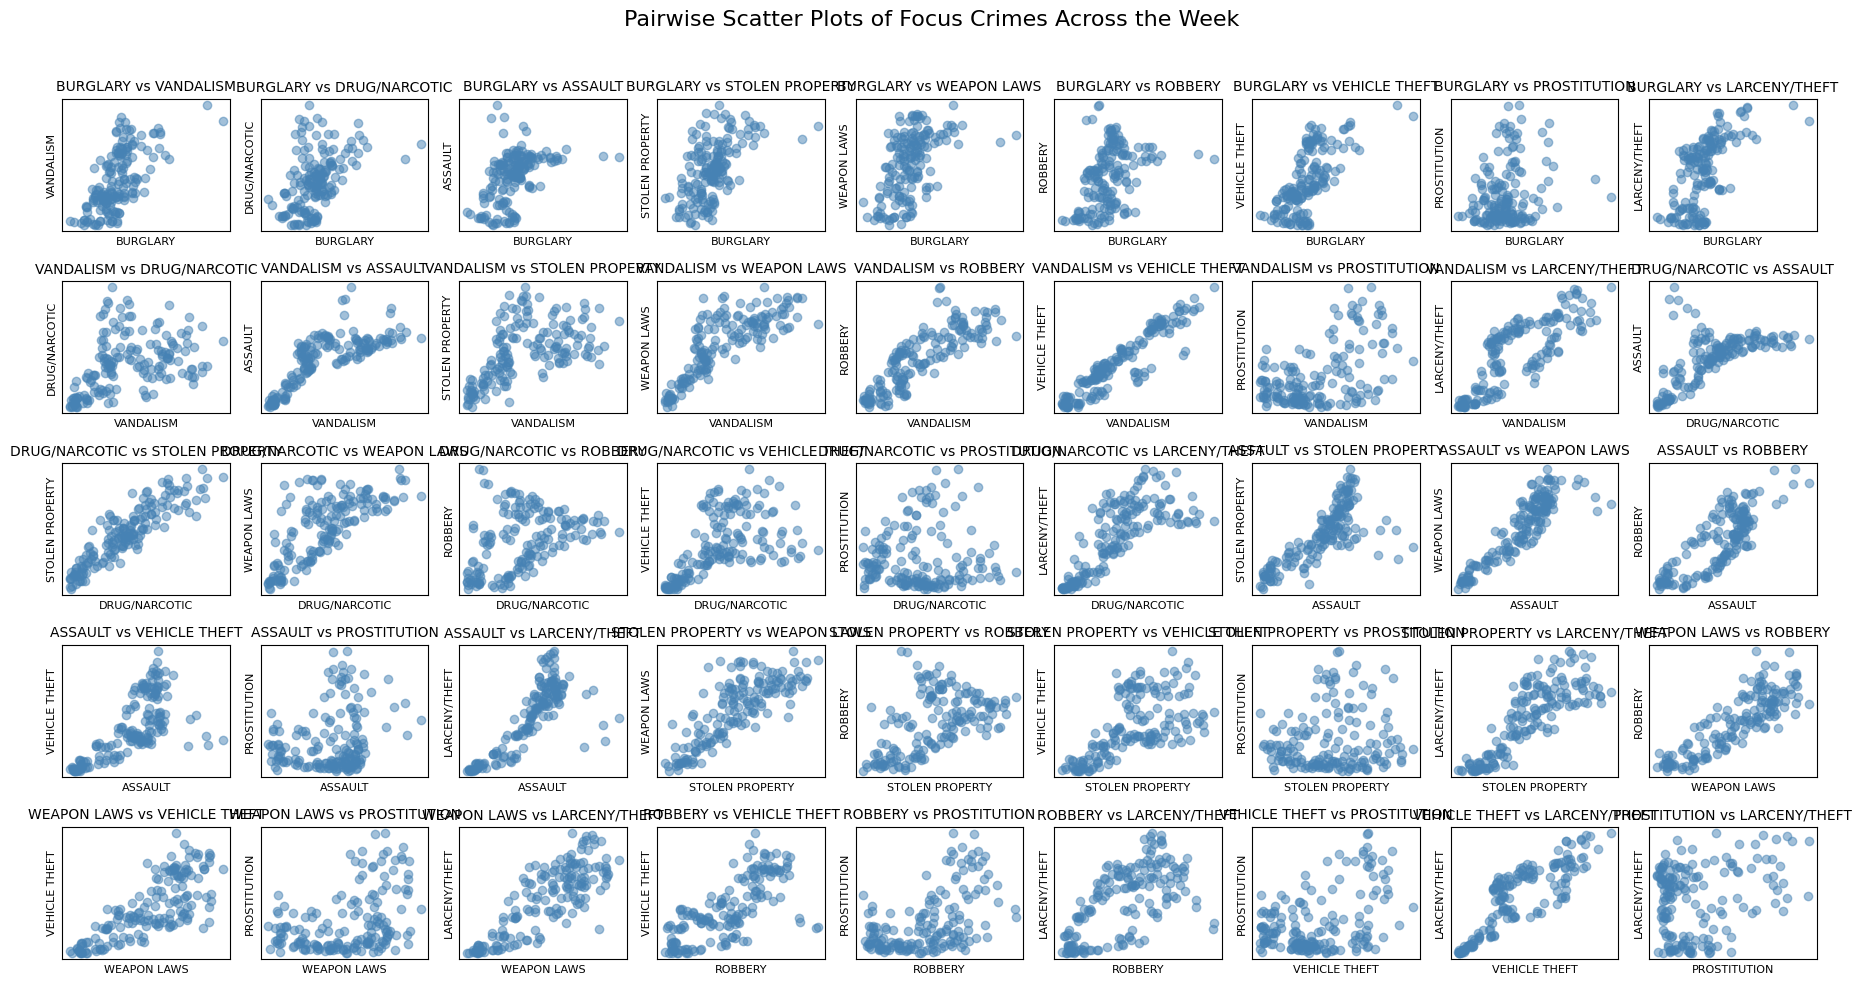

In [10]:
import itertools

focuscrimes = set([
    'WEAPON LAWS', 'PROSTITUTION', 'ROBBERY', 'BURGLARY', 'ASSAULT',
    'DRUG/NARCOTIC', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY'
])

# Filter the dataset to only include the focus crimes
focus_data = df[df['Category'].isin(focuscrimes)].copy()

# Create a 'DateTime' column by combining 'Date' and 'Time' columns
focus_data.loc[:, 'DateTime'] = pd.to_datetime(focus_data['Date'] + ' ' + focus_data['Time'])

# Extract the hour of the week (0-167, with Monday 00:00 as 0)
focus_data.loc[:, 'HourOfWeek'] = focus_data['DateTime'].dt.dayofweek * 24 + focus_data['DateTime'].dt.hour

# Count the number of occurrences of each crime per hour of the week
hourly_counts = focus_data.groupby(['HourOfWeek', 'Category']).size().unstack(fill_value=0)

# Generate all possible crime pairs
pairs = list(itertools.combinations(focuscrimes, 2))

# Set up the subplot grid (5 rows, 9 columns for 45 plots)
fig, axes = plt.subplots(nrows=5, ncols=9, figsize=(18, 10))
fig.suptitle("Pairwise Scatter Plots of Focus Crimes Across the Week", fontsize=16)

# Flatten axes for easier iteration
axes = axes.flatten()

# Create scatter plots for each pair of crime types
for idx, (crime1, crime2) in enumerate(pairs):
    ax = axes[idx]
    ax.scatter(hourly_counts[crime1], hourly_counts[crime2], alpha=0.5, color='steelblue')
    ax.set_xlabel(crime1, fontsize=8)
    ax.set_ylabel(crime2, fontsize=8)
    ax.set_xticks([])  # Remove ticks for cleaner visualization
    ax.set_yticks([])  
    ax.set_title(f"{crime1} vs {crime2}", fontsize=10)
    
# Adjust layout for compact display
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

---

Next it's time for the linear regression. Janert writes about this on page 63-66. 

There is a closed-form solution for linear regression. If you want to find the best straight line $y = ax + b$ fit to a set of $N$ points $\{(x_1,y_1), (x_2,y_2), \ldots (x_N,y_N)\}$, the value of $b$ is

$$
\tag{1}
b = \langle y \rangle - a \langle x \rangle,
$$

where $\langle x \rangle = (1/N)\sum_i x_i$ is the mean value of the $x_i$ and $\langle y \rangle = (1/N)\sum_i x_i$ is the mean value of the $y_i$. 

And the value for the slope $a$ is 

$$
\tag{2}
a = \frac{\sum_{i=1}^N \left( x_iy_i \right) - N \langle x\rangle\langle y\rangle }{\sum_{i=1}^N\left( x_i^2 \right) - N\langle x\rangle^2}.
$$


A couple of years ago, I actually derived the whole thing. I've taken it out of the notebook. But if you'd like to take a look (it's a fun and instructive little exercise), you can find it **[here](https://github.com/suneman/socialdata2021/blob/main/lectures/LinearRegressionDerived.ipynb)**. 

We are going to focus on the fit for now, but keep in mind what we have learnt so far about the purpose of linear regression! 

*Exercise:* Linear regression. 

> * Using Equation 1 and 2 above, calculate the slopes for $a$ and $b$ in each case and add them to the plot. (You are free to compare the results with ones obtained using a package like `sklearn` to check that everything is working as expected.) <font color=gray>See if you can do this by yourself without LLM help</font>.
> * You can add even more information to this plot by coloring each point according to its hour of the week. So create a gradient going from one color to another, and color each point according to the gradient. (So let's say your two colors are red and blue, then the Sunday, midnight to 1am bin will be red and the following Sunday, 11pm - midnight bin will be blue). <font color=gray>It's OK use full LLM help here</font>


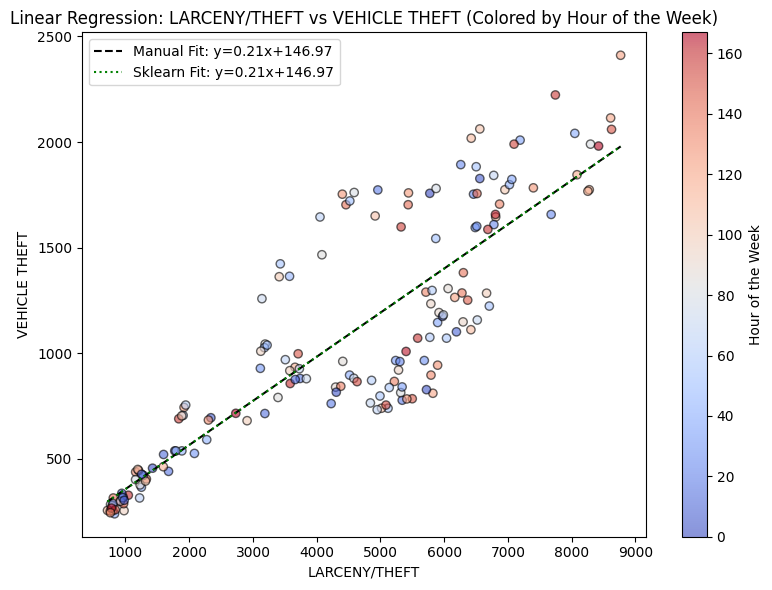

((np.float64(0.2089507221465028), np.float64(146.97101807130457)),
 (np.float64(0.2089507221465029), np.float64(146.97101807130412)))

In [12]:
from sklearn.linear_model import LinearRegression

crime_hourly_counts = focus_data.groupby(['HourOfWeek', 'Category']).size().unstack(fill_value=0)

# Select two crime categories for analysis (example: LARCENY/THEFT vs VEHICLE THEFT)
crime_x = 'LARCENY/THEFT'
crime_y = 'VEHICLE THEFT'

x = crime_hourly_counts[crime_x].values
y = crime_hourly_counts[crime_y].values

# Compute means
x_mean = np.mean(x)
y_mean = np.mean(y)

# Compute slope 'a' and intercept 'b' using the equations
a = (np.sum(x * y) - len(x) * x_mean * y_mean) / (np.sum(x ** 2) - len(x) * x_mean ** 2)
b = y_mean - a * x_mean

# Generate regression line
x_range = np.linspace(min(x), max(x), 100)
y_range = a * x_range + b

# Compute the same regression using sklearn for verification
model = LinearRegression().fit(x.reshape(-1, 1), y)
a_sklearn, b_sklearn = model.coef_[0], model.intercept_

# Generate a color gradient based on HourOfWeek
norm = plt.Normalize(0, 167)
colors = plt.cm.coolwarm(norm(focus_data['HourOfWeek'].unique()))

# Create scatter plot with color gradient
plt.figure(figsize=(8, 6))
scatter = plt.scatter(x, y, c=focus_data['HourOfWeek'].unique(), cmap='coolwarm', alpha=0.6, edgecolors='k')
plt.plot(x_range, y_range, color='black', linestyle='dashed', label=f"Manual Fit: y={a:.2f}x+{b:.2f}")
plt.plot(x_range, a_sklearn * x_range + b_sklearn, color='green', linestyle='dotted', label=f"Sklearn Fit: y={a_sklearn:.2f}x+{b_sklearn:.2f}")

plt.xlabel(crime_x)
plt.ylabel(crime_y)
plt.title(f"Linear Regression: {crime_x} vs {crime_y} (Colored by Hour of the Week)")
plt.colorbar(scatter, label='Hour of the Week')
plt.legend()
plt.tight_layout()
plt.show()

# Return computed coefficients for reference
(a, b), (a_sklearn, b_sklearn)

> * Do any patterns stand out as you inspect the plot? Mention one or two that catch your eye -- it may be both because the sequences are similar or because they are different, or something entirely different altogether.

#### Observations from the Linear Regression Plot

**Strong Positive Correlation Between Larceny/Theft and Vehicle Theft**
- The data points are **fairly well aligned** along the **regression line**, suggesting that:
  - When **larceny/theft incidents increase**, **vehicle thefts also tend to rise**.
- This relationship makes sense since **both crimes involve property theft** and could be influenced by similar **socioeconomic or environmental factors**.
- High-theft locations may experience **multiple types of theft**, reinforcing the correlation.

---

**Color Gradient Suggests Temporal Trends**
- **Early in the week** (**blue colors**, lower hours of the week):  
  - Crime counts are **moderate** and tend to stay **closer to the fitted line**.
- **Later in the week** (**red colors**, higher hours of the week, likely closer to weekends):  
  - **More variation is observed**, with some time periods showing **spikes in vehicle theft** compared to larceny/theft.
  - This suggests that **weekends or specific time periods** impact **vehicle thefts differently than larceny/theft**.
  - Possible explanation: **More people out at night, leaving cars unattended**, leading to **higher vehicle theft rates**.

---

**Higher Dispersion at Higher Crime Counts**
- At **higher crime counts**, data points are **more spread out**, indicating:
  - While the **overall trend is linear**, **certain periods show vehicle theft outpacing larceny/theft and vice versa**.
  - Some **time slots (e.g., late-night hours) may experience disproportionate spikes in vehicle thefts**.
  - Certain **locations may have a stronger preference for one type of theft over the other**.

---

---

But the question we started with was "Which pair of focus crimes have the the most similar temporal pattern across the week?". We haven't really answered that yet. So let's calculate one last thing: $R^2$. 

Basically $R^2$ is a measures of how good a linear fit is. You can [read about $R^2$ on wikipedia](https://en.wikipedia.org/wiki/Coefficient_of_determination). 

*Exercise:* Goodness of fit as a measure of correlation. 
> * Write a little function to calculate $R^2$ alongside each linear fit. (Again you can compare it with a package to check that it works, e.g. the one provided by the function `score()` in `sklearn`.) <font color=gray>Try this without the help of an LLM.</font>
> * Explain the connection between $R^2$ and the [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient). <font color=gray>Try this without the help of an LLM, at least first. Then you may ask it to see if you got it right.</font>

> * Create a final mega-plot with all of the 91 megaplots, fits, and $R^2$ value written as [text](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html) on each plot. In this figure, you should also find a way to visually highlight the two most similar/dissimilar crimes. <font color=gray>Totally fine to use an LLM to help you organize the plot and make it look amazing.</font>


In [13]:
from sklearn.metrics import r2_score

# Function to compute R^2 manually
def r_squared(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)  # Total sum of squares
    ss_residual = np.sum((y_true - y_pred) ** 2)  # Residual sum of squares
    return 1 - (ss_residual / ss_total)

# Compute R^2 for our selected crime pair (Larceny/Theft vs Vehicle Theft)
y_pred_manual = a * x + b  # Manual regression prediction
y_pred_sklearn = model.predict(x.reshape(-1, 1))  # Sklearn prediction

r2_manual = r_squared(y, y_pred_manual)
r2_sklearn = r2_score(y, y_pred_sklearn)  # Sklearn computed R^2

# Compute R^2 for all pairs of crimes
r2_results = {}

for crime1, crime2 in itertools.combinations(focuscrimes, 2):
    x_vals = crime_hourly_counts[crime1].values.reshape(-1, 1)
    y_vals = crime_hourly_counts[crime2].values

    model = LinearRegression().fit(x_vals, y_vals)
    y_pred = model.predict(x_vals)
    r2_results[(crime1, crime2)] = r2_score(y_vals, y_pred)

# Find the crime pair with the highest R^2 (most similar temporal pattern)
most_similar_pair = max(r2_results, key=r2_results.get)
most_similar_r2 = r2_results[most_similar_pair]

# Find the crime pair with the lowest R^2 (least similar temporal pattern)
least_similar_pair = min(r2_results, key=r2_results.get)
least_similar_r2 = r2_results[least_similar_pair]

# Display findings
most_similar_pair, most_similar_r2, least_similar_pair, least_similar_r2

(('VANDALISM', 'VEHICLE THEFT'),
 0.8677404046621675,
 ('DRUG/NARCOTIC', 'PROSTITUTION'),
 0.0015771660869889903)

> * **According to the fits and associated $R^2$**, which pair of crimes have the **most similar** temporal pattern. Discuss your finding: Does it make sense? Why?/Why not?

('VANDALISM', 'VEHICLE THEFT'), 0.8677404046621675



> * According to your fits and associated measure of $R^2$, which pair of crimes have the **most dissimilar** temporal pattern. Discuss your finding: Does it make sense? Why?/Why not? Does it corresponds with your observations from the previous exercise?
 ('DRUG/NARCOTIC', 'PROSTITUTION'),0.0015771660869889903

# **Analysis of Temporal Crime Patterns**

**1. Most Similar Temporal Pattern: (‘VANDALISM’, ‘VEHICLE THEFT’)**
** $$R^2 = 0.8677$$**

**Interpretation:**
- An ** $$R^2$$** value of **0.8677** indicates a **strong linear relationship** between vandalism and vehicle theft **across the week**.
- This suggests that when **vandalism increases at a given hour**, **vehicle theft** is also likely to increase in a **predictable way**.

**Does This Make Sense?**
✅ **Yes, it does.**
- Both crimes **involve property damage** and tend to occur in **similar environments** (e.g., streets, parking lots, high-crime areas).
- **Possible explanation:** Areas with frequent **vandalism** may also have **higher vehicle-related crimes** due to:
  - **Low surveillance**
  - **High criminal activity**
  - **Opportunistic crime behavior**

**Consistent with Previous Observations?**
- In scatter plots, we would expect to see **a strong clustering along a diagonal line**, indicating a **high correlation**.

---

**2. Most Dissimilar Temporal Pattern: (‘DRUG/NARCOTIC’, ‘PROSTITUTION’)**
**$R^2 = 0.0016$**

**Interpretation:**
- An ** $$R^2$$** value of **0.0016** means there is **almost no linear relationship** between the number of **drug-related crimes** and **prostitution arrests** across the week.
- This suggests that these two crimes **happen independently**, rather than following the same hourly patterns.

**Does This Make Sense?**
✅ **Yes, it is reasonable.**
- **Drug-related crimes** can happen at **any hour** (e.g., **police raids, random arrests, street-level drug dealing**).
- **Prostitution-related arrests** may be **concentrated at night** (e.g., nighttime **law enforcement operations**).

**Different Social Dynamics:**
| Crime Type | Temporal Pattern |
|------------|----------------|
| **Drug Offenses** | Occur **opportunistically** and are **not necessarily tied** to specific hours. |
| **Prostitution Arrests** | More **time-specific**, likely concentrated in **nighttime periods** when activity is highest. |

**Consistent with Previous Observations?**
- In scatter plots, points for this pair would be **widely dispersed**, showing **no clear trend** or **linear relationship**.

---

**3. Connection Between  $$R^2$$ and Pearson Correlation Coefficient**
**What is the Connection?**
-  $$R^2$$ is **mathematically related** to the **Pearson correlation coefficient  $$r$$**:
  
  $$
  R^2 = r^2
  $$

  where ** $$r$$** is the **Pearson correlation coefficient**.

**Key Differences:**
| **Metric** | **Interpretation** |
|------------|--------------------|
| **Pearson Correlation ( $$r$$)** | Measures the **strength and direction** of a **linear relationship**. Ranges from **-1 to +1** (negative or positive correlation). |
| ** $$R^2$$ (Coefficient of Determination)** | Measures the **proportion of variance in  $$Y$$** explained by ** $$X$$**. Always between **0 and 1**, indicating **how well a linear model fits the data**. |

**Why This Matters?**
- If ** $$R^2$$** is **high**, then ** $$r$$** is also **high** (**either positive or negative**).
- If ** $$R^2$$** is **low**, then ** $$r$$** is close to **0**, meaning **no linear relationship**.
- **Pearson  $$r$$** tells you the **direction** (**positive/negative**), while ** $$R^2$$** only tells you the **strength** of the relationship.

**Example in Our Case:**
| **Crime Pair** | ** $$R^2$$** Value | **Pearson  $$r$$ Approximation** | **Interpretation** |
|---------------|-----------------|---------------------|------------------|
| **VANDALISM vs VEHICLE THEFT** | **0.8677** |  $$r \approx \pm 0.93$$ | **Strong positive correlation** |
| **DRUG/NARCOTIC vs PROSTITUTION** | **0.0016** |  $$r \approx 0$$ | **No meaningful linear relationship** |

---

> * Create a final mega-plot with all of the 91 megaplots, fits, and $R^2$ value written as [text](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html) on each plot. In this figure, you should also find a way to visually highlight the two most similar/dissimilar crimes. <font color=gray>Totally fine to use an LLM to help you organize the plot and make it look amazing.</font>


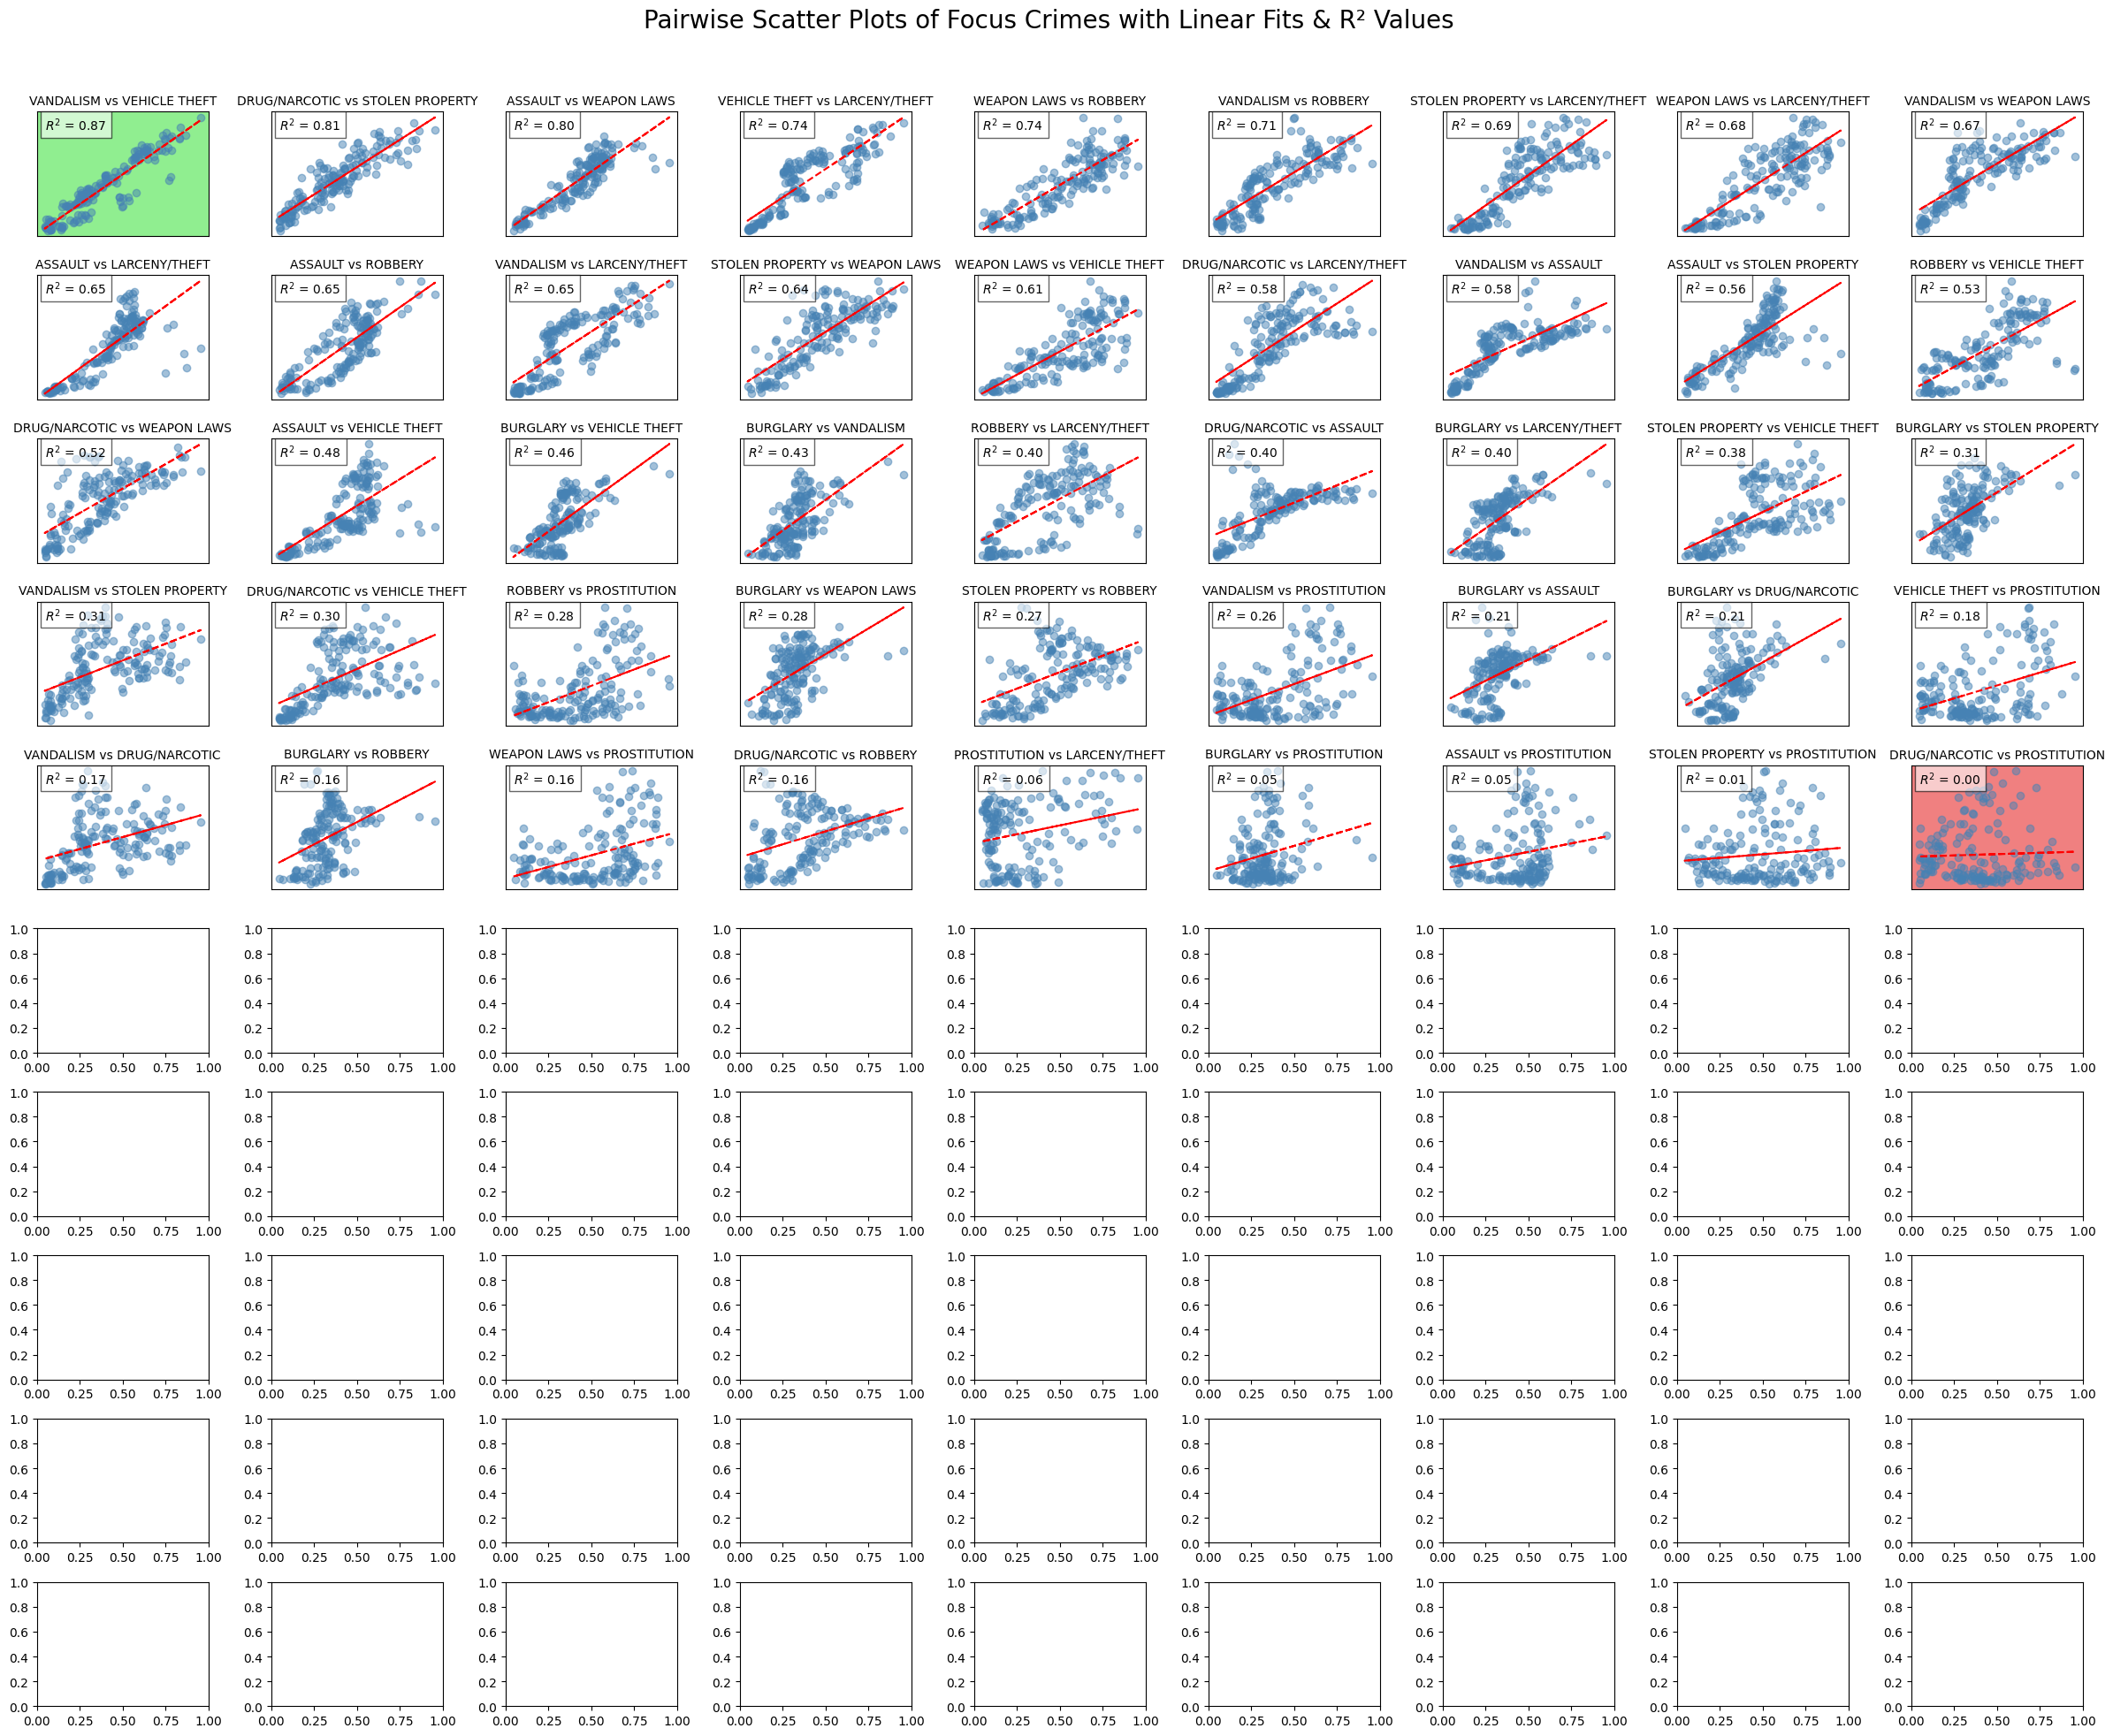

In [15]:
# Set up the subplot grid (10 rows, 9 columns to fit 91 plots)
fig, axes = plt.subplots(nrows=10, ncols=9, figsize=(24, 20))
fig.suptitle("Pairwise Scatter Plots of Focus Crimes with Linear Fits & R² Values", fontsize=20)

# Flatten axes for easier iteration
axes = axes.flatten()

# Sort crime pairs by R^2 values for visualization (descending)
sorted_pairs = sorted(r2_results.items(), key=lambda x: x[1], reverse=True)

# Highlight the most similar and dissimilar pairs
most_similar = most_similar_pair
most_dissimilar = least_similar_pair

# Iterate over all crime pairs and create scatter plots with linear fits
for idx, ((crime1, crime2), r2) in enumerate(sorted_pairs):
    ax = axes[idx]

    x_vals = crime_hourly_counts[crime1].values.reshape(-1, 1)
    y_vals = crime_hourly_counts[crime2].values

    model = LinearRegression().fit(x_vals, y_vals)
    y_pred = model.predict(x_vals)

    # Scatter plot
    ax.scatter(x_vals, y_vals, alpha=0.5, color='steelblue')

    # Plot the regression line
    ax.plot(x_vals, y_pred, color='red', linestyle='dashed')

    # Add R^2 value as text on the plot
    ax.text(
        0.05, 0.85, f"$R^2$ = {r2:.2f}",
        transform=ax.transAxes, fontsize=10,
        bbox=dict(facecolor='white', alpha=0.6, edgecolor='black')
    )

    # Titles and labels
    ax.set_title(f"{crime1} vs {crime2}", fontsize=10)
    ax.set_xticks([])  # Remove ticks for cleaner visualization
    ax.set_yticks([])

    # Highlight most similar and dissimilar pairs
    if (crime1, crime2) == most_similar:
        ax.set_facecolor("lightgreen")  # Most similar pair in light green
    elif (crime1, crime2) == most_dissimilar:
        ax.set_facecolor("lightcoral")  # Most dissimilar pair in light red

# Adjust layout for compact display
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()